----------------------

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
 Любому проекту нужно название и введение - так ты поясняешь читателю, что вообще тут происходит. Также стоит задуматься, как еще его можно дополнить, чтобы сделать более ценным для читателя. Все инструкции по оформлению проекта есть на платформе в разделе "Полезные инструкции для учебы"
    
Также советую тебе взглянуть на <a href="https://www.kaggle.com/code?sortBy=voteCount">работы</a> профессиональных аналитиков, чтобы оценить, как другие люди оформляют и проводят исследования.   

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

# Статистический анализ данных. Сервис аренды самокатов GoFast.

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.
    
**Описание данных**

Пользователи

- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)

Поездки

- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки

Подписки

- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа

**План действий**

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from math import sqrt

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('datasets/users_go.csv', sep=',')
rides = pd.read_csv('datasets/rides_go.csv', sep=',')
subscriptions = pd.read_csv('datasets/subscriptions_go.csv', sep=',')

In [3]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Промежуточные выводы о исходных данных.

- В нашем распоряжении три таблицы
    1. users с id, именем, возрастом, городом и типом подписки каждого пользователя
    2. rides с id, дальностью поездки, ее длительностью и датой
    3. subscriptions со стоимостью поездок для пользователей с подпиской и без

Название колонок соответствует содержанию и переведены в нижный регистр.

Тип данных в некоторых колонках таблицы `rides` надо изменить.

#### Шаг 2. Предобработка данных

Для обработки данных строковые столбцы для удобства переведем в нижний регистр

In [8]:
users['name'] = users['name'].str.lower()
users['city'] = users['city'].str.lower()

Посмотрим кол-во пропуков

In [9]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

Как можно заметить их нет

Переведем колонку `date` в datetime формат

In [11]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Добавим колонку с месяцем

In [12]:
rides['month'] = rides['date'].dt.month

In [13]:
rides['month'].unique()

array([ 1,  4,  8, 10, 11, 12,  3,  6,  7,  2,  5,  9])

In [14]:
rides['date'].dt.year.unique()

array([2021])

Округлим значения до одного знака в колонках `distance`, поскольку остальные нам не нужны. `duration` округлим в большую часть и переведем в int.

In [15]:
rides['distance'] = round(rides['distance'], 1)

Рассмотрим теперь дубликаты

In [16]:
users.duplicated().sum()

31

In [17]:
duplicatedrows = users[users.duplicated(keep='last')]
duplicatedrows

,user_id,name,age,city,subscription_type
15,16,амалия,27,краснодар,ultra
42,43,стефания,22,омск,ultra
46,47,юрий,28,тюмень,ultra
71,72,никита,25,москва,ultra
107,108,влада,29,тюмень,ultra
120,121,алина,25,пятигорск,ultra
126,127,павел,25,пятигорск,ultra
135,136,марсель,25,тюмень,ultra
152,153,герман,23,москва,ultra
203,204,руслан,30,пятигорск,ultra


In [18]:
rides.duplicated().sum()

0

In [19]:
users = users.drop_duplicates().reset_index(drop=True)

In [20]:
users.value_counts()

user_id  name       age  city            subscription_type
1        кира       22   тюмень          ultra                1
1020     камилла    32   москва          free                 1
1029     игорь      21   краснодар       free                 1
1028     вадим      17   сочи            free                 1
1027     мария      21   сочи            free                 1
                                                             ..
510      роман      24   ростов-на-дону  ultra                1
509      ян         29   москва          ultra                1
508      станислав  15   тюмень          ultra                1
507      эвелина    27   пятигорск       ultra                1
1534     альберт    25   краснодар       free                 1
Name: count, Length: 1534, dtype: int64

##### Предобработка данных промежуточный вывод

- Все колонки str были приведены в нижний регистр
- Пропуски в данных отсутствуют
- Таблица `rides` столбец `date` был переведен в datetime тип
- `distance` были округлен, первое до одного знака
- Были обработаны дубликаты в таблице users, в остальных отсутствуют явные дубликаты и пропуски

#### Шаг 3. Исследовательский анализ данных

In [21]:
users.pivot_table(index='city', 
                  values='user_id', 
                  aggfunc='count')

,user_id
city,
екатеринбург,204
краснодар,193
москва,168
омск,183
пятигорск,219
ростов-на-дону,198
сочи,189
тюмень,180


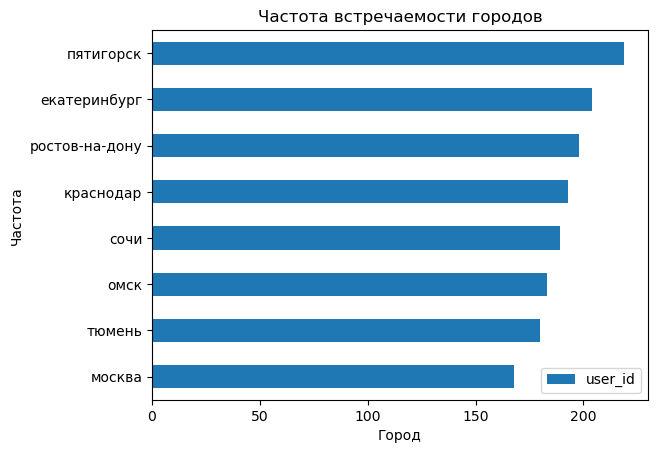

In [22]:
(users.pivot_table(index='city', 
                  values='user_id', 
                  aggfunc='count')
     .sort_values(by='user_id')
     .plot.barh(xlabel='Город', ylabel='Частота', title='Частота встречаемости городов'));

In [23]:
users['city'].value_counts()

city
пятигорск         219
екатеринбург      204
ростов-на-дону    198
краснодар         193
сочи              189
омск              183
тюмень            180
москва            168
Name: count, dtype: int64

Получилась интересная тендеция, где в небольшом городе Пятигорске больше пользователей, чем в крупных городах. Это может быть связано с тем, что в крупных городах более развитая система общественного транспорта или наличие машины, поэтому самокаты менее предпочтительны в этих городах

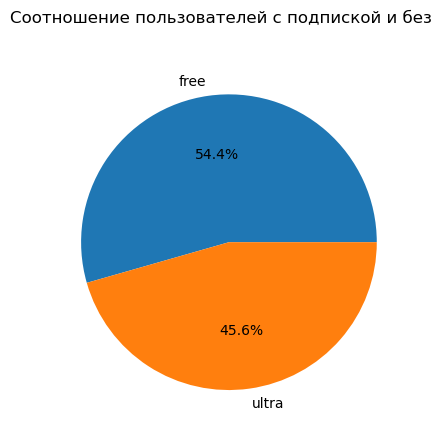

In [24]:
ax = (users
    .pivot_table(
        index='subscription_type', 
        values='user_id', 
        aggfunc='count'
                )
    .plot.pie(
        subplots=True,
        legend=False,
        xlabel='',
        ylabel='',
        title='Соотношение пользователей с подпиской и без',
        autopct='%1.1f%%'));

Людей без подписки меньше, что логично, но различие не такое весомое, 54% без и 46% с подпиской ultra

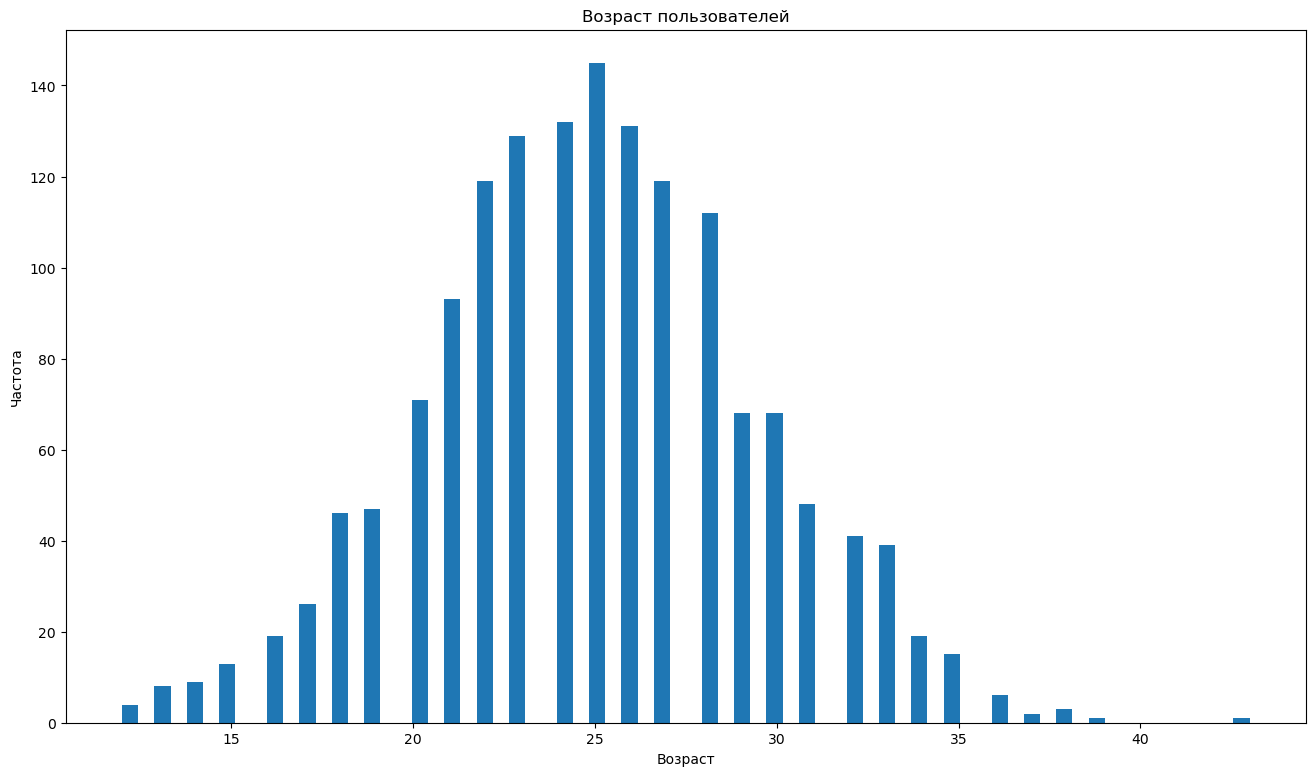

In [25]:
ax = users['age'].plot.hist(bins=70, figsize=(16, 9), title='Возраст пользователей')
ax.set_xlabel('Возраст')
ax.set_ylabel('Частота')
plt.show()

In [26]:
round(users['age'].describe(), 0).astype(int)

count    1534
mean       25
std         5
min        12
25%        22
50%        25
75%        28
max        43
Name: age, dtype: int32

Получилось что-то похожее на нормальное распределение, больше всего пользователей возрастом 25 лет

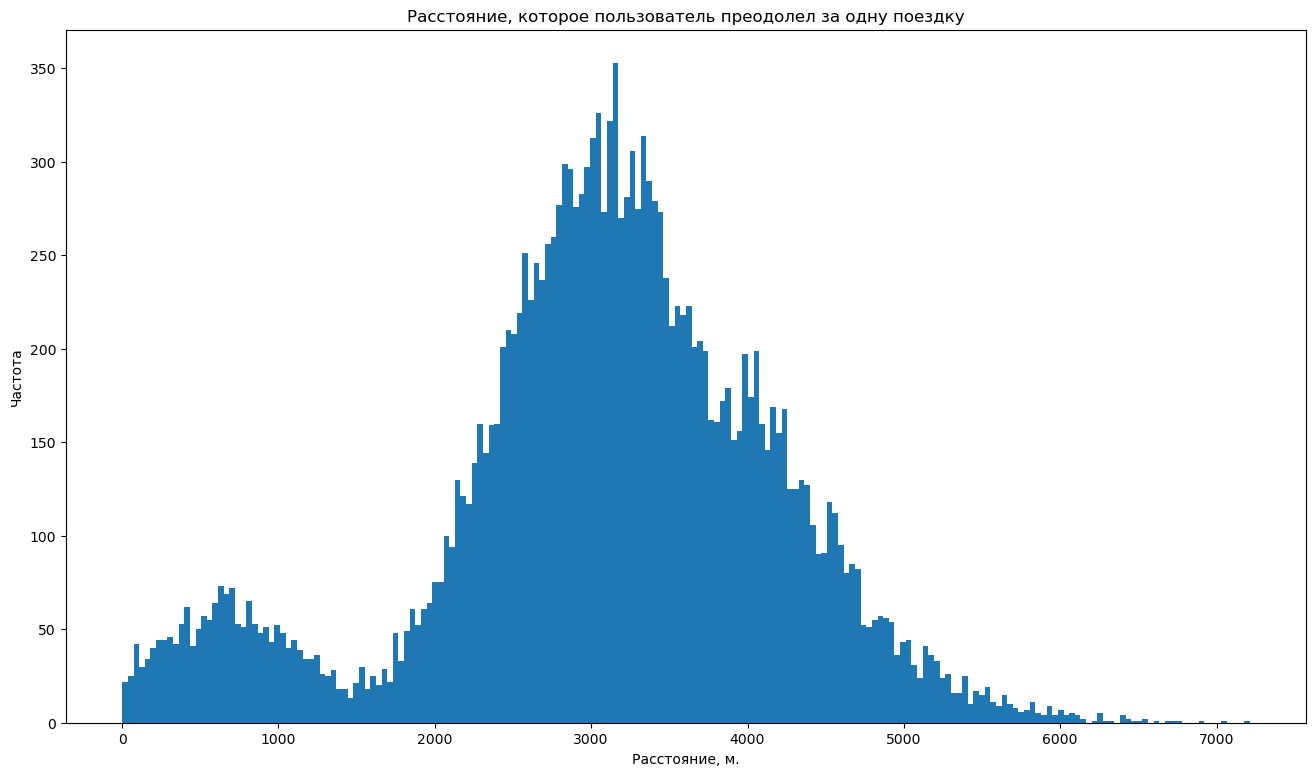

In [27]:
ax = rides['distance'].plot.hist(bins=200, figsize=(16, 9));
ax.set_xlabel('Расстояние, м.')
ax.set_ylabel('Частота')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.show()

Как можно заметить, больше всего поездок около 3 км., что так же можно объяснить альтернативой общественному транспорту в маленьких городах

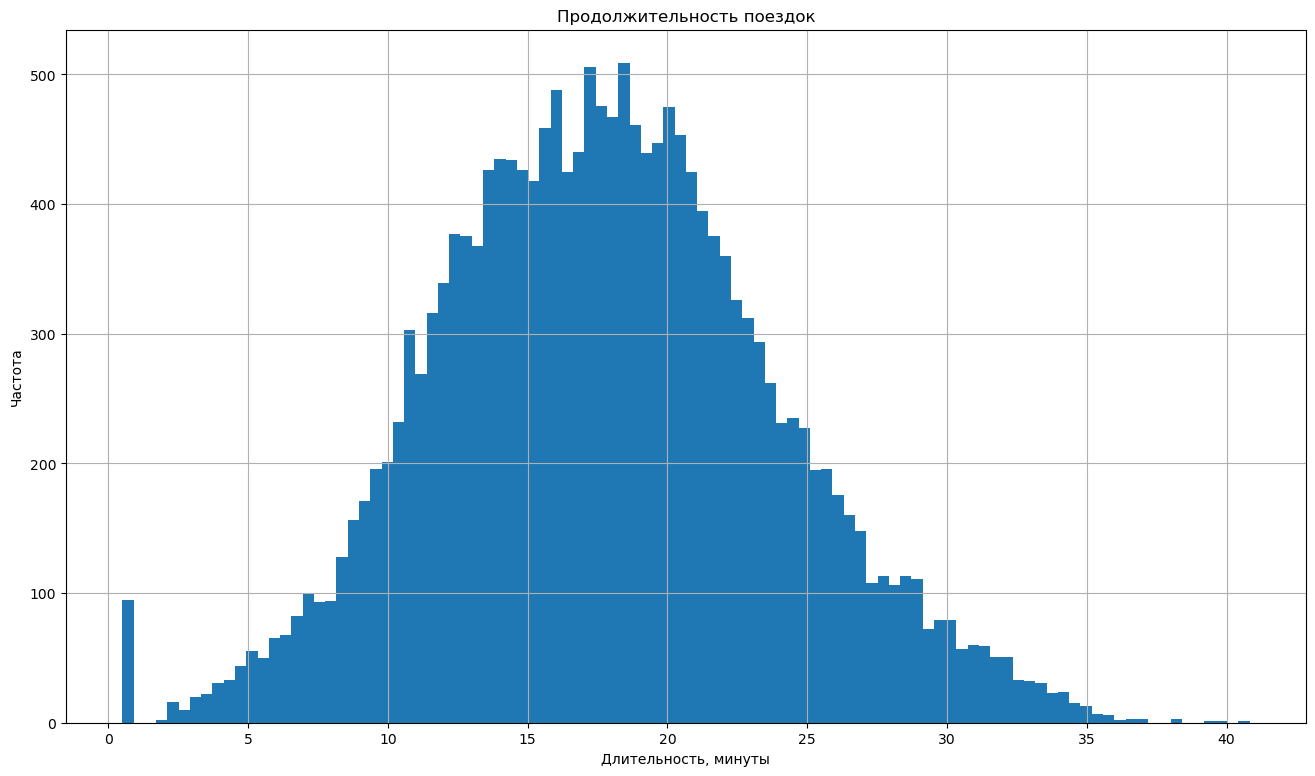

In [28]:
ax = rides['duration'].hist(bins=100, figsize=(16, 9));
ax.set_xlabel('Длительность, минуты')
ax.set_ylabel('Частота')
plt.title('Продолжительность поездок')
plt.show()

Наиболее частая продолжительность поездки 13 минут, а значения около нуля могут быть связаны с первым использованием сервиса

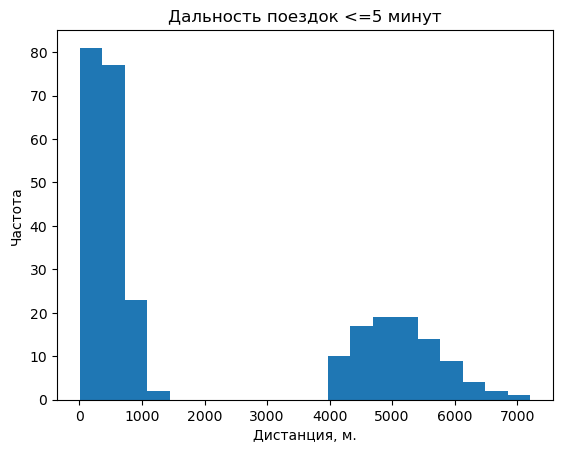

In [29]:
fig = rides.query('duration <= 5')['distance'].plot.hist(bins=20)
fig.set_xlabel('Дистанция, м.')
fig.set_ylabel('Частота')
plt.title('Дальность поездок <=5 минут')
plt.show()

Как можно увидеть, присутствуют аномалии, при длительность поездки самокат преодолел более 4 км., поэтому надо обработать эту аномалию

In [30]:
rides = rides.query('duration > 2')

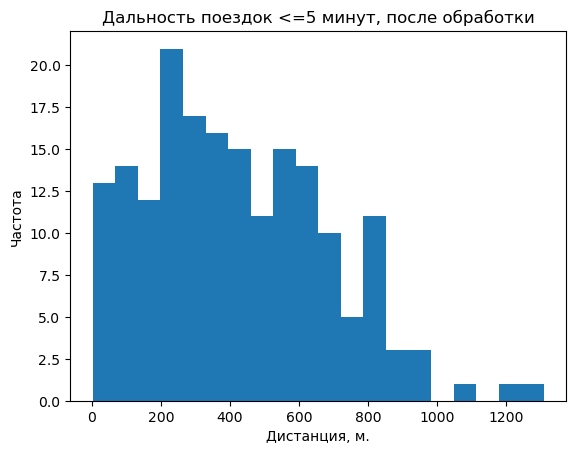

In [31]:
fig = rides.query('duration <= 5')['distance'].plot.hist(bins=20)
fig.set_xlabel('Дистанция, м.')
fig.set_ylabel('Частота')
plt.title('Дальность поездок <=5 минут, после обработки')
plt.show()

Исходя из полученных графиков, в общем датафрейме проведем обработку аномалий связанных с около нулевой продолжительностью поездки, в которых оказалось, что при малой длительности самокат преодолел огромные расстояния, поэтому эти не будут учитываться.

#### Шаг 4. Объединение данных

Объеденим все данные из обоих таблиц

In [32]:
rides['duration'] = np.ceil(rides['duration']).astype(int)

In [33]:
users_rides = users.merge(rides, how='outer')
users_rides = users_rides.merge(subscriptions, how='left', left_on='subscription_type', right_on='subscription_type')
users_rides.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,кира,22,тюмень,ultra,4409.9,26,2021-01-01,1,6,0,199
1,1,кира,22,тюмень,ultra,2617.6,16,2021-01-18,1,6,0,199
2,1,кира,22,тюмень,ultra,754.2,7,2021-04-20,4,6,0,199
3,1,кира,22,тюмень,ultra,2694.8,19,2021-08-11,8,6,0,199
4,1,кира,22,тюмень,ultra,4028.7,27,2021-08-28,8,6,0,199
5,1,кира,22,тюмень,ultra,2770.9,17,2021-10-09,10,6,0,199
6,1,кира,22,тюмень,ultra,3039.0,15,2021-10-19,10,6,0,199
7,1,кира,22,тюмень,ultra,2842.1,24,2021-11-06,11,6,0,199
8,1,кира,22,тюмень,ultra,3412.7,16,2021-11-14,11,6,0,199
9,1,кира,22,тюмень,ultra,748.7,16,2021-11-22,11,6,0,199


Теперь проверим на наличие пропусков в полученной таблице

In [34]:
users_rides.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Создадим еще две таблицы пользователей с и без подписки

In [35]:
users_rides_free = users_rides.query('subscription_type == "free"')
users_rides_ultra = users_rides.query('subscription_type == "ultra"')

In [36]:
def histograms(data1, data2):
    plt.figure(figsize=[16, 10])
    plt.subplots_adjust(left=0.13, 
                    right=0.93, 
                    top=1.0, 
                    bottom= 0.27, 
                    wspace= 0.5, 
                    hspace=0.5)
    
    plt.subplot(221)
    data1_pivot = data1.pivot_table(index='city', 
                  values='user_id', 
                  aggfunc='count')
    data2_pivot = data2.pivot_table(index='city', 
                  values='user_id', 
                  aggfunc='count')
    plt.bar(data1_pivot.index,
            data1_pivot['user_id'],
            label='free');
    plt.bar(data2_pivot.index,
            data2_pivot['user_id'],
            label='ultra');
    plt.xlabel('Город', fontsize=10, fontweight='bold')
    plt.xticks(rotation=40, fontsize=10, fontweight='bold')
    plt.ylabel('Частота', fontsize=10, fontweight='bold')
    plt.title('Частота встречаемости городов')
    plt.grid()
    plt.legend()
    
    plt.subplot(222)
    plt.hist(data1['age'], bins=70, label='free');
    plt.hist(data2['age'], bins=70, label='ultra');
    plt.xlabel('Возраст, г.', fontsize=10, fontweight='bold')
    plt.ylabel('Частота', fontsize=10, fontweight='bold')
    plt.title('возраст пользователей')
    plt.grid()
    plt.legend()
    
    plt.subplot(223)
    plt.hist(data1['distance'], bins=200, label='free');
    plt.hist(data2['distance'], bins=200, label='ultra');
    plt.xlabel('Дистанция поездки, м.', fontsize=10, fontweight='bold')
    plt.ylabel('Частота', fontsize=10, fontweight='bold')
    plt.title('расстояние, которое пользователь преодолел за одну поездку')
    plt.grid()
    plt.legend()
    
    plt.subplot(224)
    plt.hist(data1['duration'], bins=100, label='free');
    plt.hist(data2['duration'], bins=100, label='ultra');
    plt.ylabel('Частота', fontsize=10, fontweight='bold')
    plt.xlabel('Длительность, мин.', fontsize=10, fontweight='bold')
    plt.title('продолжительность поездок')
    plt.grid()
    plt.legend()
    
    plt.show()

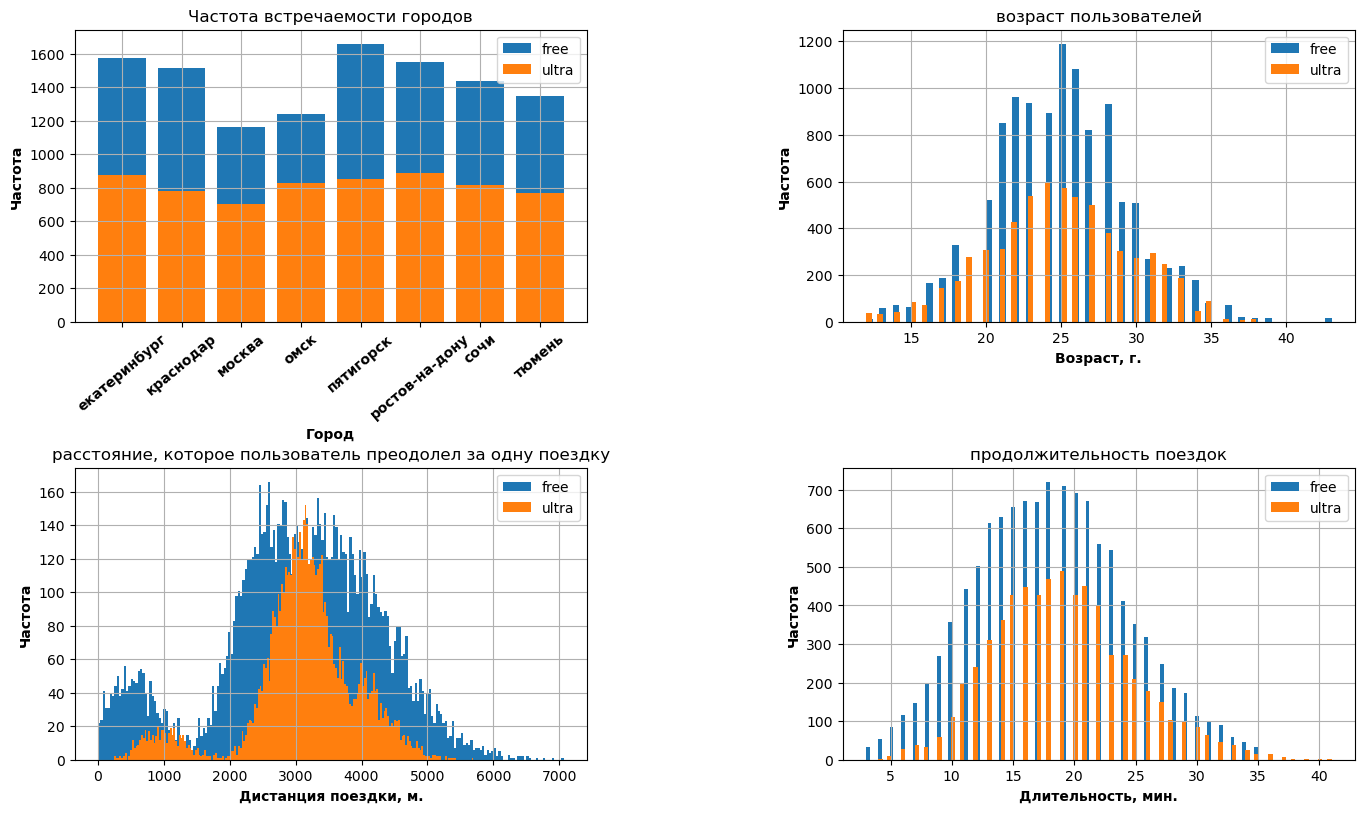

In [37]:
histograms(users_rides_free, users_rides_ultra)

- Частота встречаемости городов:
    1. `free`, такая же тендеция как и для общей таблицы
    2. `ultra`, количество пользователей примерно одинаковое во всех городах
- Возраст пользователей:
    1. `free`, уже не нормальное распределение, но с такой же модой как и общей зависимости
    2. `ultra`, нормальное распределение с такой же модой
- Расстояние, которое пользователь преодолел за одну поездку
    1. `free`, уже не очевидна мода, и распределение очень сильно отличается от общей
    2. `ultra`, мода равна 3 км.
- Продолжительность поездок:
    1. `free`, похоже на нормальное распределение с большими флуктуациями, мода равна 13 минутам
    2. `ultra`, также нормальное, мода равна 19 минутам
    
`duration` была округлена до большего знака и изменен тип данных на int

#### Шаг 5. Подсчёт выручки

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

In [38]:
# Создадим сводную таблицу с индексами месяца и id пользователя и применим агрегирующие функции
users_rides_free_pivot = users_rides_free\
    .pivot_table(index=['user_id','month'],
                 values=['distance', 'duration'], 
                 aggfunc=['sum', 'count'])

# Переименуем столбцы для удобства и удалим ненужный
users_rides_free_pivot.columns = ['distance', 'duration', 'count', 'count1']
users_rides_free_pivot.pop('count1')

# Добавим столбец с выручкой
users_rides_free_pivot['gain'] = np.ceil(users_rides_free_pivot['count'] * subscriptions.loc[0, 'start_ride_price'] 
                                         + users_rides_free_pivot['duration'] * subscriptions.loc[0, 'minute_price'])
users_rides_free_pivot['gain'] = users_rides_free_pivot['gain'].astype(int)
users_rides_free_pivot

distance  duration  count  gain
user_id month                                 
700     1        2515.7        15      1   170
        2       13446.6        89      5   962
        3        3798.3        19      1   202
        4        2984.6        16      1   178
        6        5927.6        29      2   332
...                 ...       ...    ...   ...
1534    6        3409.4        26      2   308
        8        7622.4        48      2   484
        9        4928.2        23      1   234
        11      13350.0        78      4   824
        12       2371.7        16      1   178

[6767 rows x 4 columns]

In [39]:
# Аналогично
users_rides_ultra_pivot = users_rides_ultra\
    .pivot_table(index=['user_id','month'],
                 values=['distance', 'duration'], 
                 aggfunc=['sum', 'count'])

users_rides_ultra_pivot.columns = ['distance', 'duration', 'count', 'count1']

users_rides_ultra_pivot.pop('count1')
users_rides_ultra_pivot['gain'] = np.ceil(users_rides_ultra_pivot['duration'] * subscriptions.loc[1, 'minute_price'] + 
                                          subscriptions.loc[1, 'subscription_fee'])
users_rides_ultra_pivot['gain'] = users_rides_ultra_pivot['gain'].astype(int)
users_rides_ultra_pivot

distance  duration  count  gain
user_id month                                 
1       1        7027.5        42      2   451
        4         754.2         7      1   241
        8        6723.5        46      2   475
        10       5809.9        32      2   391
        11       7003.5        56      3   535
...                 ...       ...    ...   ...
699     6        4072.8        17      1   301
        8        7018.3        45      2   469
        9        6364.9        31      2   385
        10       4707.8        16      1   295
        12       3202.9        26      1   355

[4533 rows x 4 columns]

In [40]:
# Создадим сводную таблицу
users_rides_pivot = (users_rides
                     .pivot_table(
                         index=['user_id', 'month','subscription_type'], 
                         values=['distance', 'duration'],
                         aggfunc=['sum', 'count'])
                                 )
# Переименуем колонки для удобства
users_rides_pivot.columns = ['distance', 'duration', 'count', 'count1']
# Удалим одинаковые колонки
users_rides_pivot.pop('count1')
# Уберем индексы для того чтобы обратиться к ним
users_rides_pivot = users_rides_pivot.reset_index()
# Добавим значения по цене за поездку
users_rides_pivot = (users_rides_pivot
                     .merge(users_rides[['user_id','minute_price', 'start_ride_price','subscription_fee']],
                            how='left', 
                            left_on='user_id', 
                            right_on='user_id'))
# Удалим дубликаты
users_rides_pivot = users_rides_pivot.drop_duplicates()
# Добавим колонку с помесячной прибылью для каждого пользователя
users_rides_pivot['gain'] = (users_rides_pivot['subscription_fee'] + 
                             users_rides_pivot['start_ride_price'] * users_rides_pivot['count'] +
                            users_rides_pivot['duration'] * users_rides_pivot['minute_price'])
#Удалим ненужные строки
users_rides_pivot = users_rides_pivot.drop(['minute_price', 'start_ride_price', 'subscription_fee'], axis=1)

users_rides_pivot_free = users_rides_pivot.query('subscription_type == "free"')
users_rides_pivot_ultra = users_rides_pivot.query('subscription_type == "ultra"')
users_rides_pivot_free

,user_id,month,subscription_type,distance,duration,count,gain
45507,700,1,free,2515.7,15,1,170
45525,700,2,free,13446.6,89,5,962
45543,700,3,free,3798.3,19,1,202
45561,700,4,free,2984.6,16,1,178
45579,700,6,free,5927.6,29,2,332
...,...,...,...,...,...,...,...
142272,1534,6,free,3409.4,26,2,308
142285,1534,8,free,7622.4,48,2,484
142298,1534,9,free,4928.2,23,1,234
142311,1534,11,free,13350.0,78,4,824


In [41]:
# код ревьюера

agg_tbl = users_rides.groupby(['user_id', 'month']).agg({'subscription_type' : 'first'
                                        , 'duration' : 'sum'
                                        , 'distance' : 'sum'
                                        , 'date' : 'count'
                                       }
                                      ).reset_index() # формируем сводную таблицу

rev_table = agg_tbl.merge(subscriptions, on='subscription_type') # добавляем данные о тарифах

rev_table['revenue'] = (rev_table['duration'] * rev_table['minute_price'] 
                     + rev_table['start_ride_price'] * rev_table['date'] # считаем выручку
                     + rev_table['subscription_fee']
                       )

display(rev_table.head())

,user_id,month,subscription_type,duration,distance,date,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,ultra,42,7027.5,2,6,0,199,451
1,1,4,ultra,7,754.2,1,6,0,199,241
2,1,8,ultra,46,6723.5,2,6,0,199,475
3,1,10,ultra,32,5809.9,2,6,0,199,391
4,1,11,ultra,56,7003.5,3,6,0,199,535


#### Шаг 6. Проверка гипотез

Зададим уровень стат. значимости

In [42]:
alpha = .05

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу.

Для начала сформулируем нулевую гипотезу $H_0$ - среднее значение пройденной дистанции пользователя с подпиской и без будут равны, $H_1$ - пользователи с подпиской тратят больше времени (правостороняя), исходя из построенных гистограмм, можно заметить, что дисперсии двух выборок не равны.

Вначале напишем функию для проверки pvalue

In [43]:
def pvalue(result):
    print(result.pvalue)
    
    if result.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [44]:
result = st.ttest_ind(users_rides_ultra['duration'],
                     users_rides_free['duration'],
                     equal_var=False,
                     alternative='greater')
pvalue(result)

3.086332092684639e-29
Отвергаем нулевую гипотезу


**Отсюда, можно сделать вывод, что пользователи c подпиской в среднем используют самокаты дольше, чем без.**

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Правостороняя гипотеза $H_0 \; : \; \bar{x}=3130$ для пользователей с подпиской, $H_1 \; : \; \bar{x}>3130$

In [45]:
expected = 3130
result = st.ttest_1samp(users_rides.query('subscription_type == "ultra"')['distance'], expected, alternative='greater')

pvalue(result)

0.9195427368335852
Не получилось отвергнуть нулевую гипотезу


**Да, среднее расстояние, которое пользователи с подпиской проезжает за одну поездку, не превышает 3130 м.**

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Правостороняя гипотеза, $H_0 \; : \; \bar{x}_{free}=\bar{x_{ultra}}$ по месяцам, $H_1 \; : \; \bar{x}_{ultra}>\bar{x}_{free}$

In [46]:
result = st.ttest_ind(users_rides_pivot_free['gain'], 
                      users_rides_pivot_ultra['gain'], 
                      equal_var=False, alternative='less')
pvalue(result)

2.4970242872858465e-38
Отвергаем нулевую гипотезу


In [47]:
print(users_rides_pivot_free['gain'].mean())
print(users_rides_pivot_ultra['gain'].mean())

329.3326437121324
362.7921906022502


**Пользователи с подпиской тратят больше в месяц, чем без.**

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Поскольку здесь сама выборка до и после зависима, то стоит использовать `scipy.stats.ttest_rel(до, после, alternative='greater')`, и указать левосторонюю гипотезу.

$H_0$ - не изменилась, $H_1$ - стало меньше обращений

#### Шаг 7. Распределения

##### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Количество промокодов, которое нужно разослать: 1172


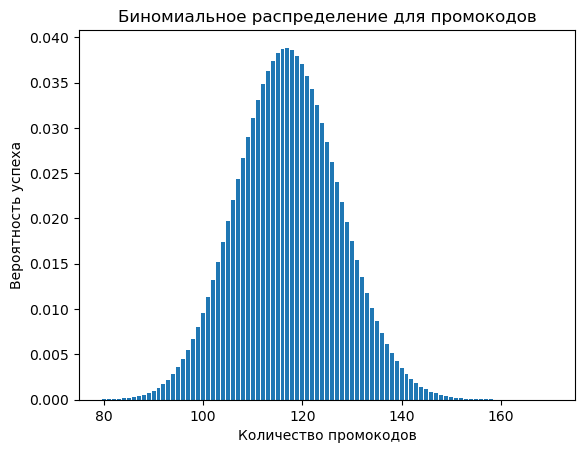

In [48]:
p = .1 # вероятность успеха
x = 100 # Количество подписок
n = 600
# Напишем цикл который найдет нужное количество попыток
while x > 0:
    
    if (1 - st.binom.cdf(x, n, p)) >= .95:
        break
        
    n += 1

distr = []
for k in range(0, n + 1):
    current_value = st.binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr)
plt.xlim(75, 175)
plt.xlabel('Количество промокодов')
plt.ylabel('Вероятность успеха')
plt.title('Биномиальное распределение для промокодов')
print('Количество промокодов, которое нужно разослать:',n)

**Из полученных данных можно сделать вывод, что нужно отправить 1172 промокода, чтобы вероятность успеха состовляла >= 95%**

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [49]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

0.15371708296369768


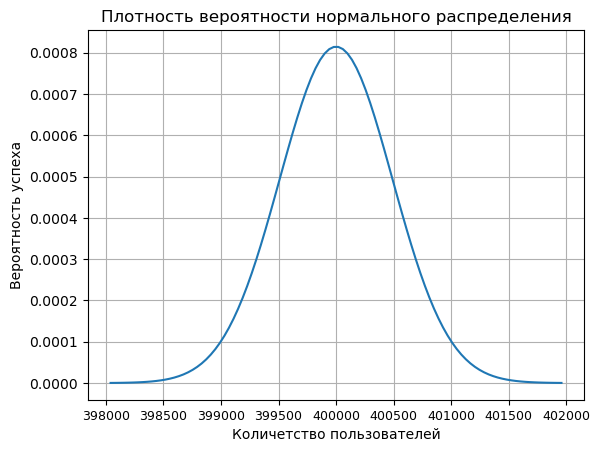

In [50]:
# задаём параметры биномиального распределения
p = .4 
n = 10**6
x = 399.5 * 10**3

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:

if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):

    distr = st.norm(mu, sigma)
    print(distr.cdf(x))
    
    y = linspace(left, right, 100)
    plt.plot(y, st.norm.pdf(y, mu, sigma))
    plt.xticks(fontsize=9)
    plt.title('Плотность вероятности нормального распределения')
    plt.xlabel('Количетство пользователей')
    plt.ylabel('Вероятность успеха')
    plt.grid()
else:
    print('Условие не выполняется')
    


**Ответ: вероятность, что уведомление откроют не более 399,5 тыс. пользователей равна 15%**

# Заключение

**Предобработка данных**
- были обработаны дубликаты в `users`
- в таблице `rides` столбец `date` был приведен к типу даты pandas
- добавлена новая колонка `month`

**Исследовательский анализ данных**
1. частота встречаемости городов. В небольшом городе Пятигорске больше пользователей, чем в крупных городах. Это может быть связано с тем, что в крупных городах более развитая система общественного транспорта или наличие машины, поэтому самокаты менее предпочтительны в этих городах
2. соотношение пользователей с подпиской и без подписки. Людей без подписки меньше, что логично, но различие не такое весомое, 54% без и 46% с подпиской ultra
3. возраст пользователей. Получилось нормальное распределение, больше всего пользователей возрастом 25 лет
4. расстояние, которое пользователь преодолел за одну поездку. Как можно заметить, больше всего поездок около 3 км., что так же можно объяснить альтернативой общественному транспорту в маленьких городах
5. продолжительность поездок. Наиболее частая продолжительность поездки 13 минут, а значения около нуля могут быть связаны с первым использованием сервиса

**Объединение данных**
- Исходные таблицы были объеденены в один датафрейм
- Было создано еще два датафрейма для людей с подпиской и без

Визуализация полученной информации
- Частота встречаемости городов:
    1. `free`, такая же тендеция как и для общей таблицы
    2. `ultra`, количество пользователей примерно одинаковое во всех городах
- Возраст пользователей:
    1. `free`, уже не нормальное распределение, но с такой же модой как и общей зависимости
    2. `ultra`, нормальное распределение с такой же модой
- Расстояние, которое пользователь преодолел за одну поездку
    1. `free`, уже не очевидна мода, и распределение очень сильно отличается от общей
    2. `ultra`, мода равна 3 км.
- Продолжительность поездок:
    1. `free`, похоже на нормальное распределение с большими флуктуациями, мода равна 13 минутам
    2. `ultra`, также нормальное, мода равна 19 минутам
    
Исходя из визуализиции были обработаны аномалии.

**Подсчёт выручки**

- Были созданы датафреймы с агрегированными данными о поездках на основе датафрейма с объединёнными данными, с суммарным расстоянием, количеством поездок и суммарным время для каждого пользователя за каждый месяц.
- В эту таблицу были добавлен столбец с месячной выручкой

**Проверка гипотез**
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. **Пользователи c подпиской в среднем используют самокаты дольше, чем без.**
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? **Да, среднее расстояние, которое пользователи с подпиской проезжает за одну поездку, не превышает 3130 м.**
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. **Пользователи без подписки тратят больше, чем с подпиской.**
4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы? **Поскольку здесь сама выборка до и после зависима, то стоит использовать `scipy.stats.ttest_rel(до, после, alternative='greater')`, и указать левосторонюю гипотезу. $H_0$ - не изменилась, $H_1$ - стало меньше обращений**

**Распределения**
1. Отдел маркетинга GoFast: **нужно отправить 1172 промокода, чтобы вероятность успеха состовляла >= 95% и 100 пользователей продлили подписку**
2. Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении: **вероятность, что уведомление откроют не более 399,5 тыс. пользователей равна 15%**